경사하강법(선형회기)
선형회기 - 경사하강법(gradient descent) - gradient: 미분 후 값 
비용함수 cost(x) - 곡선의 형태로 나옴 -> 곡선의 최솟값은 극솟값 들 중 1개
경사하강법은 gradient가 0에 가까워지도록 하는 방법

Regression: 회기분석 - 상관관계의 함수 알아내기
Classification: 분류 - Binary(Y or N), Multi-label(A,B,C,D,E)

MNIST data set 
데이터 수 = Training set + Test set
Image: 784 x 데이터 수 (784 = 28 x 28 픽셀)
label: 10 x 데이터 수 (10 -> 0~9임을 나타냄)

퍼셉트론 Perceptron
∑{w(가중치) x x(입력치)}> 0(역치) -> True

여러층의 퍼셉트론 -> Artificial Neural Network 인공신경망(ANN)

ANN종류
1.Feed foreard neural-network -> 이전 layer의 값만 다음 layer에 영향을 줌
   = 지금 하고 있는것
  
2.Recurrent neural-network -> 가장 생물학적인 network, 
   같은 layer간의 feedback도 존재, input이 들어오는 경로와 시간도 제각각



여기부터 딥러닝임
TensorFlow 
Tensor : N 차원벡터





# 라이브러리 + Data set 불러오기

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Training data 불러오기
training_data_file = pd.read_csv('mnist_exampledata1.csv')
training_data_list = training_data_file.to_numpy()  #ndarray로
# Testing data 불러오기
test_data_file = pd.read_csv('mnist_exampledata1.csv')
test_data_list = test_data_file.to_numpy()

In [88]:
np.shape(training_data_list)

(9999, 785)

In [89]:
np.shape(test_data_list)

(9999, 785)

# Neural Network class 정의

In [90]:

class ANN:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learning_rate
    
    def activation_function(self, x): #시그모이드 활성화 함수
        return 1 / (1 + np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors) 
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs



# 학습 + 테스트 
최적의 hidden layer -> input, output 사이

input hidden nodes: 200
input initial learning rate: 0.12
input epochs: 20
input decay rate: 0.7
input decay step: 3
training 1
training 2
Learning rate is decayed to 0.08399999999999999
training 3
training 4
training 5
Learning rate is decayed to 0.05879999999999999
training 6
training 7
training 8
Learning rate is decayed to 0.04115999999999999
training 9
training 10
training 11
Learning rate is decayed to 0.02881199999999999
training 12
training 13
training 14
Learning rate is decayed to 0.020168399999999993
training 15
training 16
training 17
Learning rate is decayed to 0.014117879999999994
training 18
training 19
training 20


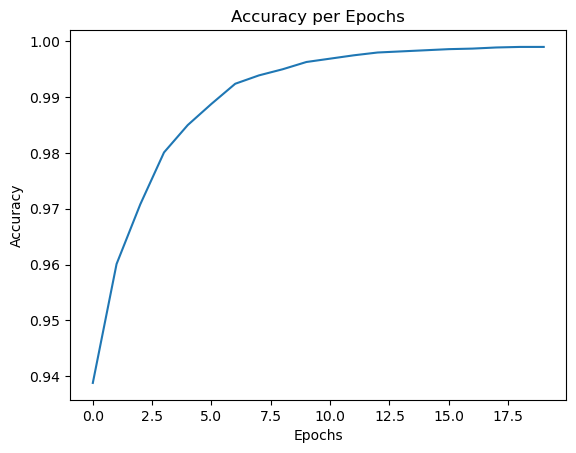

Best Accuracy: 0.998999899989999
Best Epoch: 19


In [98]:
# parameter 조절
input_nodes = 784
hidden_nodes = int(input("input hidden nodes: "))
output_nodes = 10
learning_rate = float(input("input initial learning rate: "))
epochs = int(input("input epochs: "))
decay_rate = float(input("input decay rate: "))
decay_steps = int(input("input decay step: "))

n = ANN(input_nodes, hidden_nodes, output_nodes, learning_rate)

accuracy_values = []  # 정확도를 저장할 리스트 생성

# Training data로 ANN 학습
for epoch in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(record[0])] = 0.99
        n.train(inputs, targets)
        
    # 학습률의 점진적인 감소 추가
    if (epoch+1) % decay_steps == 0:
        n.lr *= decay_rate
        print('Learning rate is decayed to', n.lr,)
    
    print('training', epoch+1)

    # 정확도 계산하여 리스트에 추가
    scorecard = []
    for record in test_data_list:
        correct_label = int(record[0])  # correct_label = 실제 숫자 label
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        outputs = n.query(inputs)
        label = np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    
    accuracy = sum(scorecard) / len(scorecard)
    accuracy_values.append(accuracy)

# 정확도 그래프 그리기
plt.plot(range(epochs), accuracy_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epochs')
plt.show()

# 최고 정확도 및 해당 epoch 찾기
max_accuracy = max(accuracy_values)
best_epoch = accuracy_values.index(max_accuracy) + 1
print("Best Accuracy:", max_accuracy)
print("Best Epoch:", best_epoch)
